In [1]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pmdarima

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import seaborn as sns
from sklearn.metrics import mean_absolute_error

In [4]:
data = pd.read_csv("GB.csv")

In [5]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
data.shape

(5762, 7)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5762 entries, 0 to 5761
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5762 non-null   object 
 1   Open       5762 non-null   float64
 2   High       5762 non-null   float64
 3   Low        5762 non-null   float64
 4   Close      5762 non-null   float64
 5   Adj Close  5762 non-null   float64
 6   Volume     5762 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 315.2+ KB


In [8]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5.762000e+03
mean,160.717986,162.655643,158.761075,160.732162,140.676221,5.264446e+06
std,71.225751,71.755243,70.613907,71.177093,73.187668,6.077306e+06
min,54.000000,54.540001,47.410000,52.000000,42.490295,1.076000e+05
25%,100.552502,102.277499,99.162501,100.705002,81.146532,2.487625e+06
50%,157.605004,159.699997,156.004998,157.750000,134.576713,3.553000e+06
75%,199.507496,201.847496,197.419995,199.502499,177.186802,5.578525e+06
max,423.119995,426.160004,413.760010,423.850006,419.154236,1.145907e+08


In [9]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,04-05-1999,76.000000,77.250000,70.000000,70.375000,53.576797,22320900
1,05-05-1999,69.875000,69.875000,66.250000,69.125000,52.625153,7565700
2,06-05-1999,68.000000,69.375000,67.062500,67.937500,51.721100,2905700
3,07-05-1999,67.937500,74.875000,66.750000,74.125000,56.431648,4862300
4,10-05-1999,73.375000,73.500000,70.250000,70.687500,53.814709,2589400
...,...,...,...,...,...,...,...
5757,18-03-2022,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
5758,21-03-2022,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
5759,22-03-2022,342.200012,346.239990,340.119995,343.010010,343.010010,2840200
5760,23-03-2022,340.000000,340.829987,335.130005,335.609985,335.609985,2196800


In [10]:
data['Date']=pd.to_datetime(data['Date'],dayfirst = True,infer_datetime_format=True)

In [11]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5757,2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100
5758,2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200
5759,2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200
5760,2022-03-23,340.000000,340.829987,335.130005,335.609985,335.609985,2196800
5761,2022-03-24,336.440002,337.500000,334.299988,336.230011,336.230011,1943600


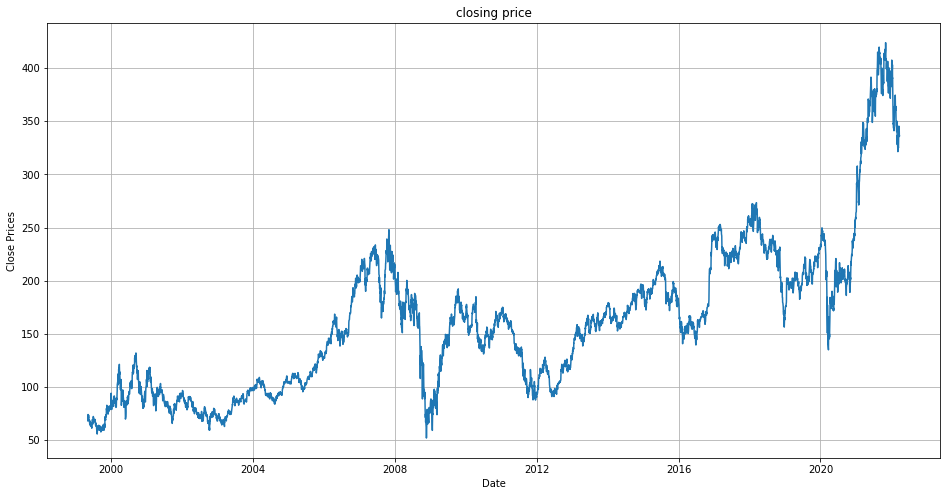

In [12]:
#plot close price
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(data['Date'],data["Close"])
plt.title('closing price')
plt.show()


In [13]:
data['Year'] =pd.DatetimeIndex(data['Date']).year
data['Month'] =pd.DatetimeIndex(data['Date']).month

In [14]:
data

,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,1999-05-04,76.000000,77.250000,70.000000,70.375000,53.576797,22320900,1999,5
1,1999-05-05,69.875000,69.875000,66.250000,69.125000,52.625153,7565700,1999,5
2,1999-05-06,68.000000,69.375000,67.062500,67.937500,51.721100,2905700,1999,5
3,1999-05-07,67.937500,74.875000,66.750000,74.125000,56.431648,4862300,1999,5
4,1999-05-10,73.375000,73.500000,70.250000,70.687500,53.814709,2589400,1999,5
...,...,...,...,...,...,...,...,...,...
5757,2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100,2022,3
5758,2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200,2022,3
5759,2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200,2022,3
5760,2022-03-23,340.000000,340.829987,335.130005,335.609985,335.609985,2196800,2022,3


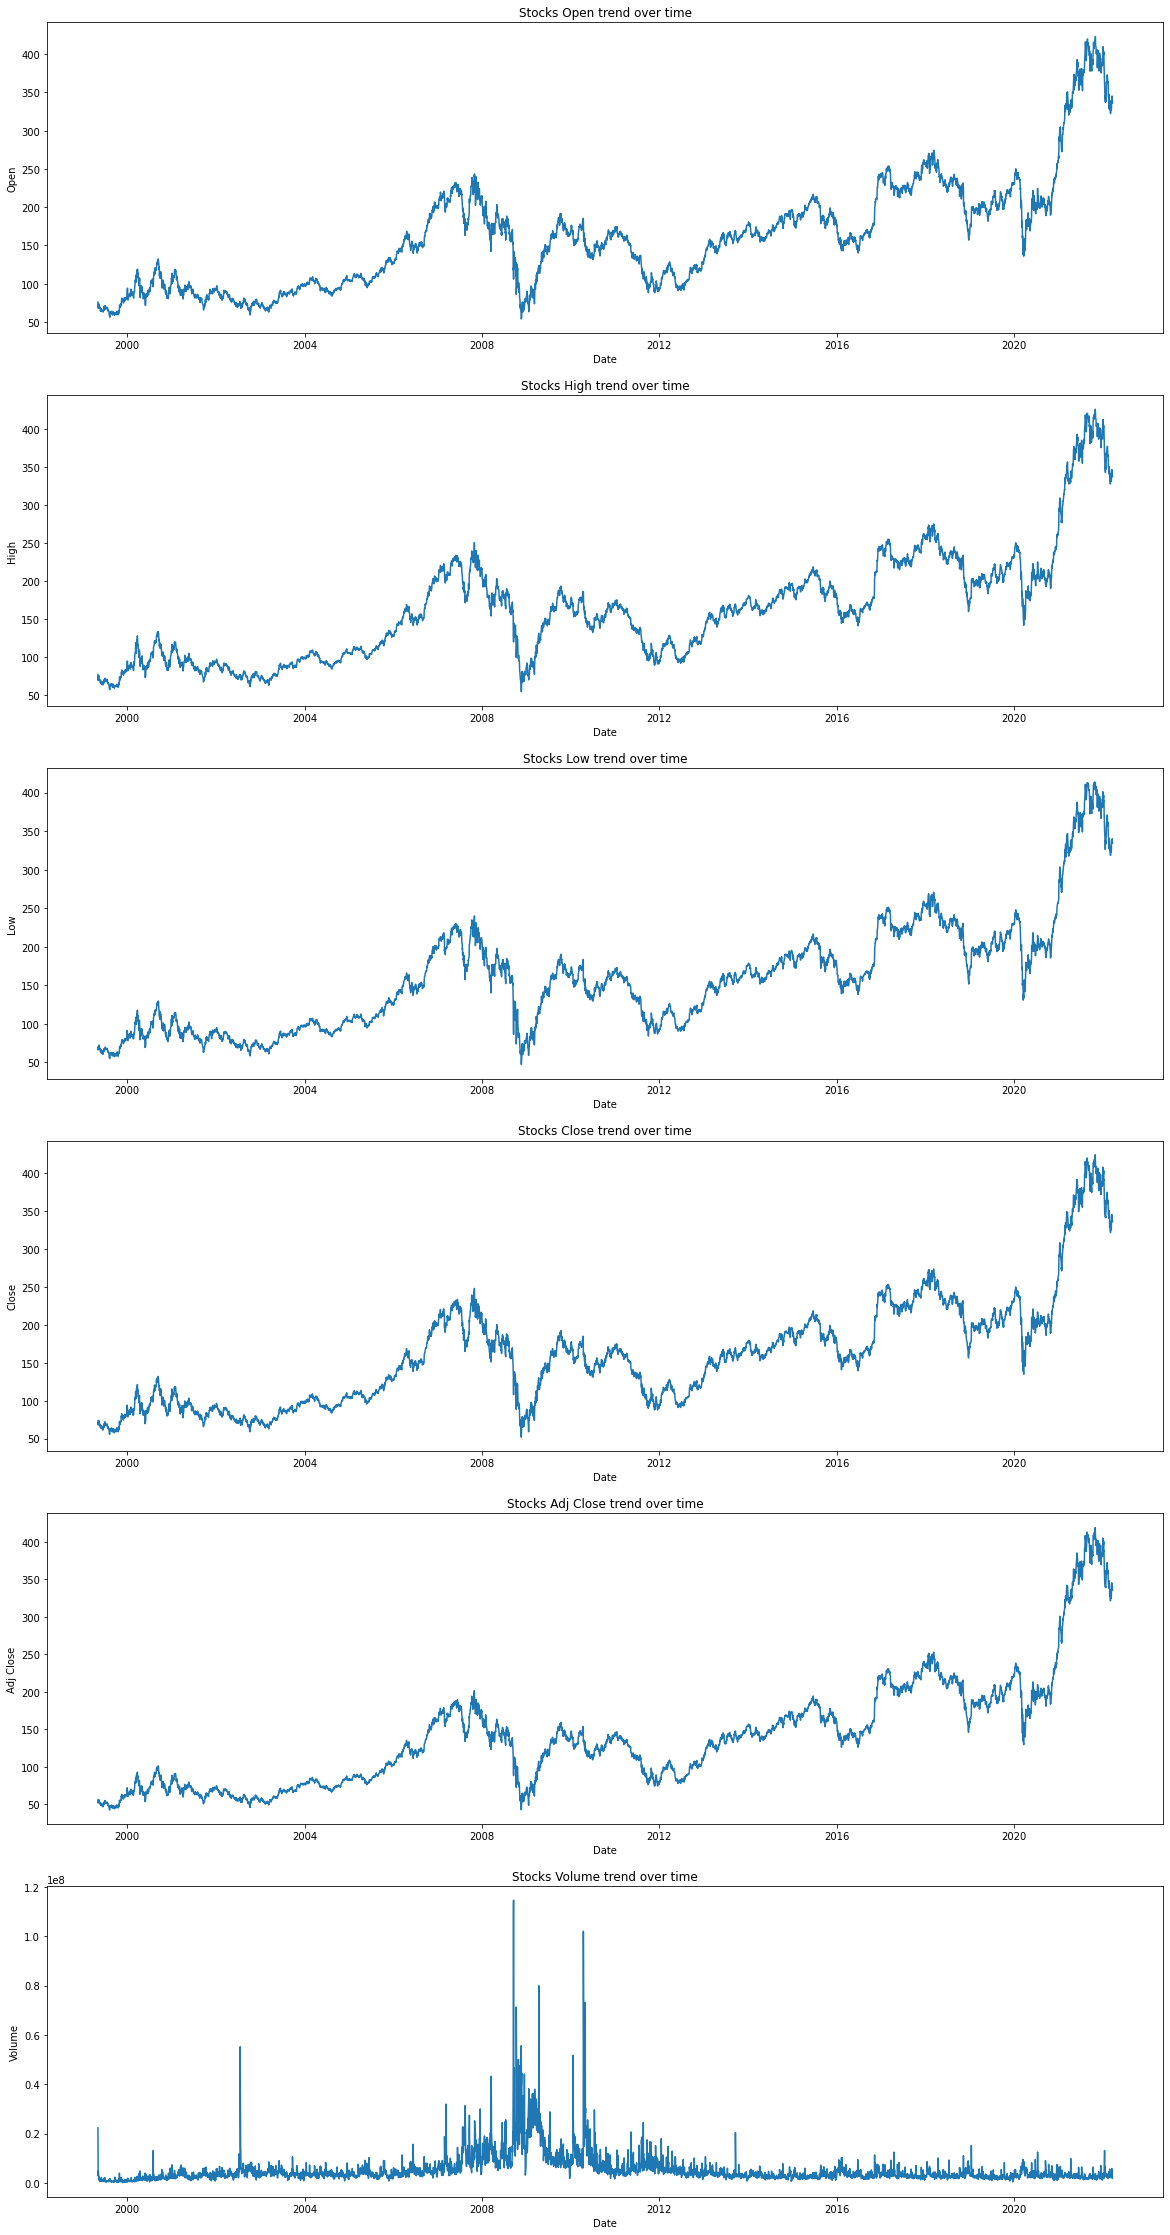

In [37]:
figure = plt.figure(figsize=(20,40))
for a,x in enumerate(["Open","High","Low","Close","Adj Close","Volume"]):
    plots = figure.add_subplot(6,1,a+1)
    plt.plot(data['Date'],data[x])
    plots.set_title("Stocks {i} trend over time".format(i=x))
    plots.set_xlabel('Date')
    plots.set_ylabel(x)
    


In [16]:
yearwise = data.groupby('Year').count()

In [17]:
years = data.Year.unique()

In [18]:
years

array([1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020,
       2021, 2022], dtype=int64)

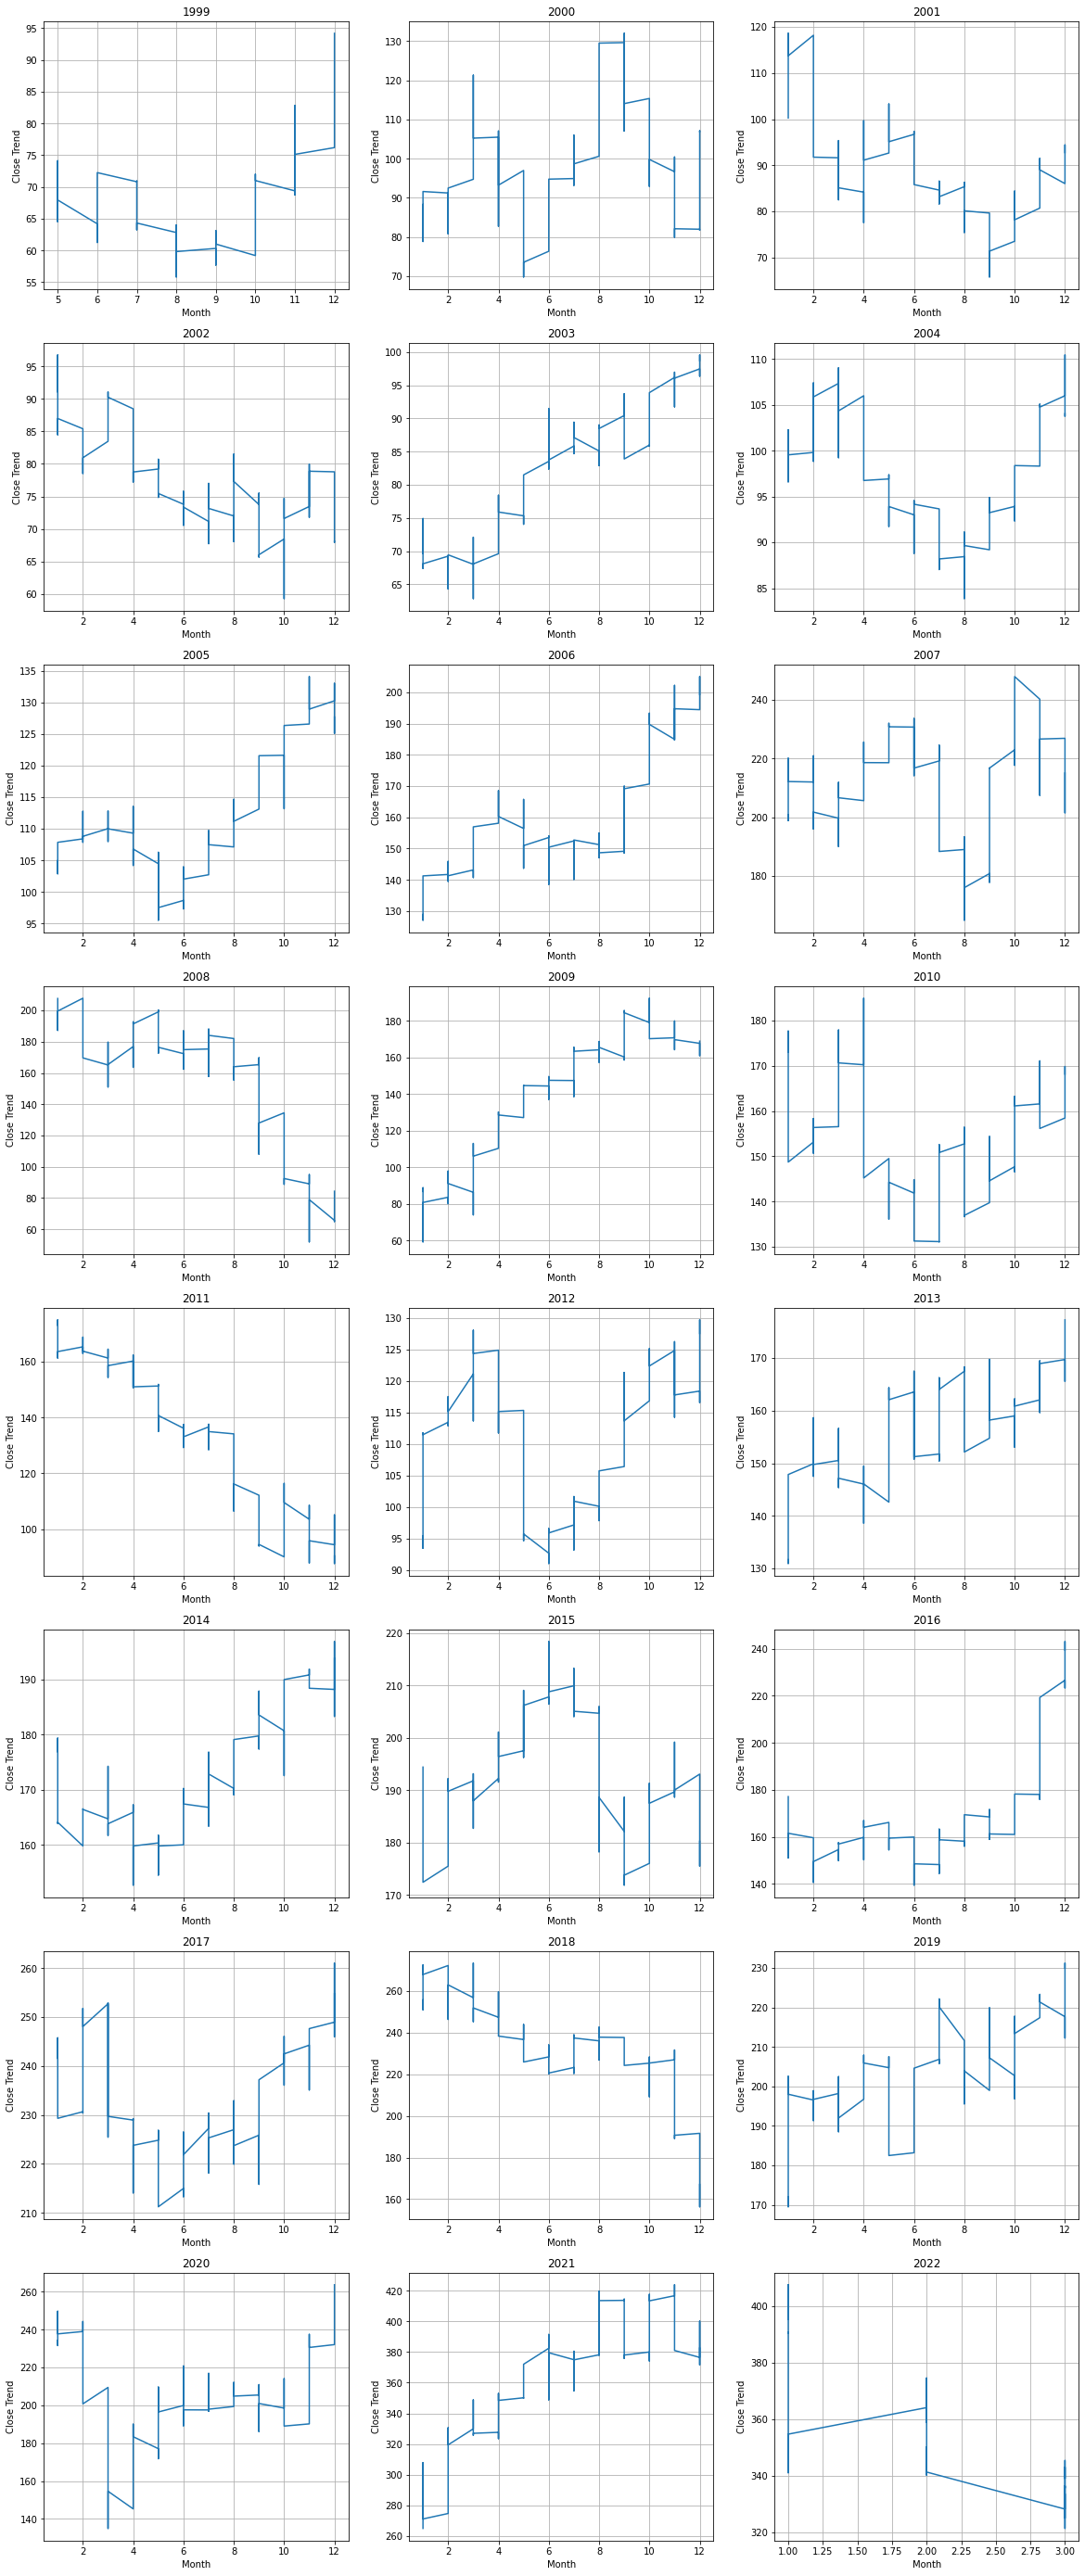

In [19]:
figure = plt.figure(figsize=(20,50))
for a,x in enumerate(years):
    plots = figure.add_subplot(8,3,a+1)
    plt.grid(True)
    P=data.loc[data['Year']==x,['Close','Month']]
    plt.plot(P['Month'],P['Close'])
    plots.set_title(x)
    plots.set_xlabel('Month')
    plots.set_ylabel('Close Trend')
    

In [20]:
month = data.Month.unique()

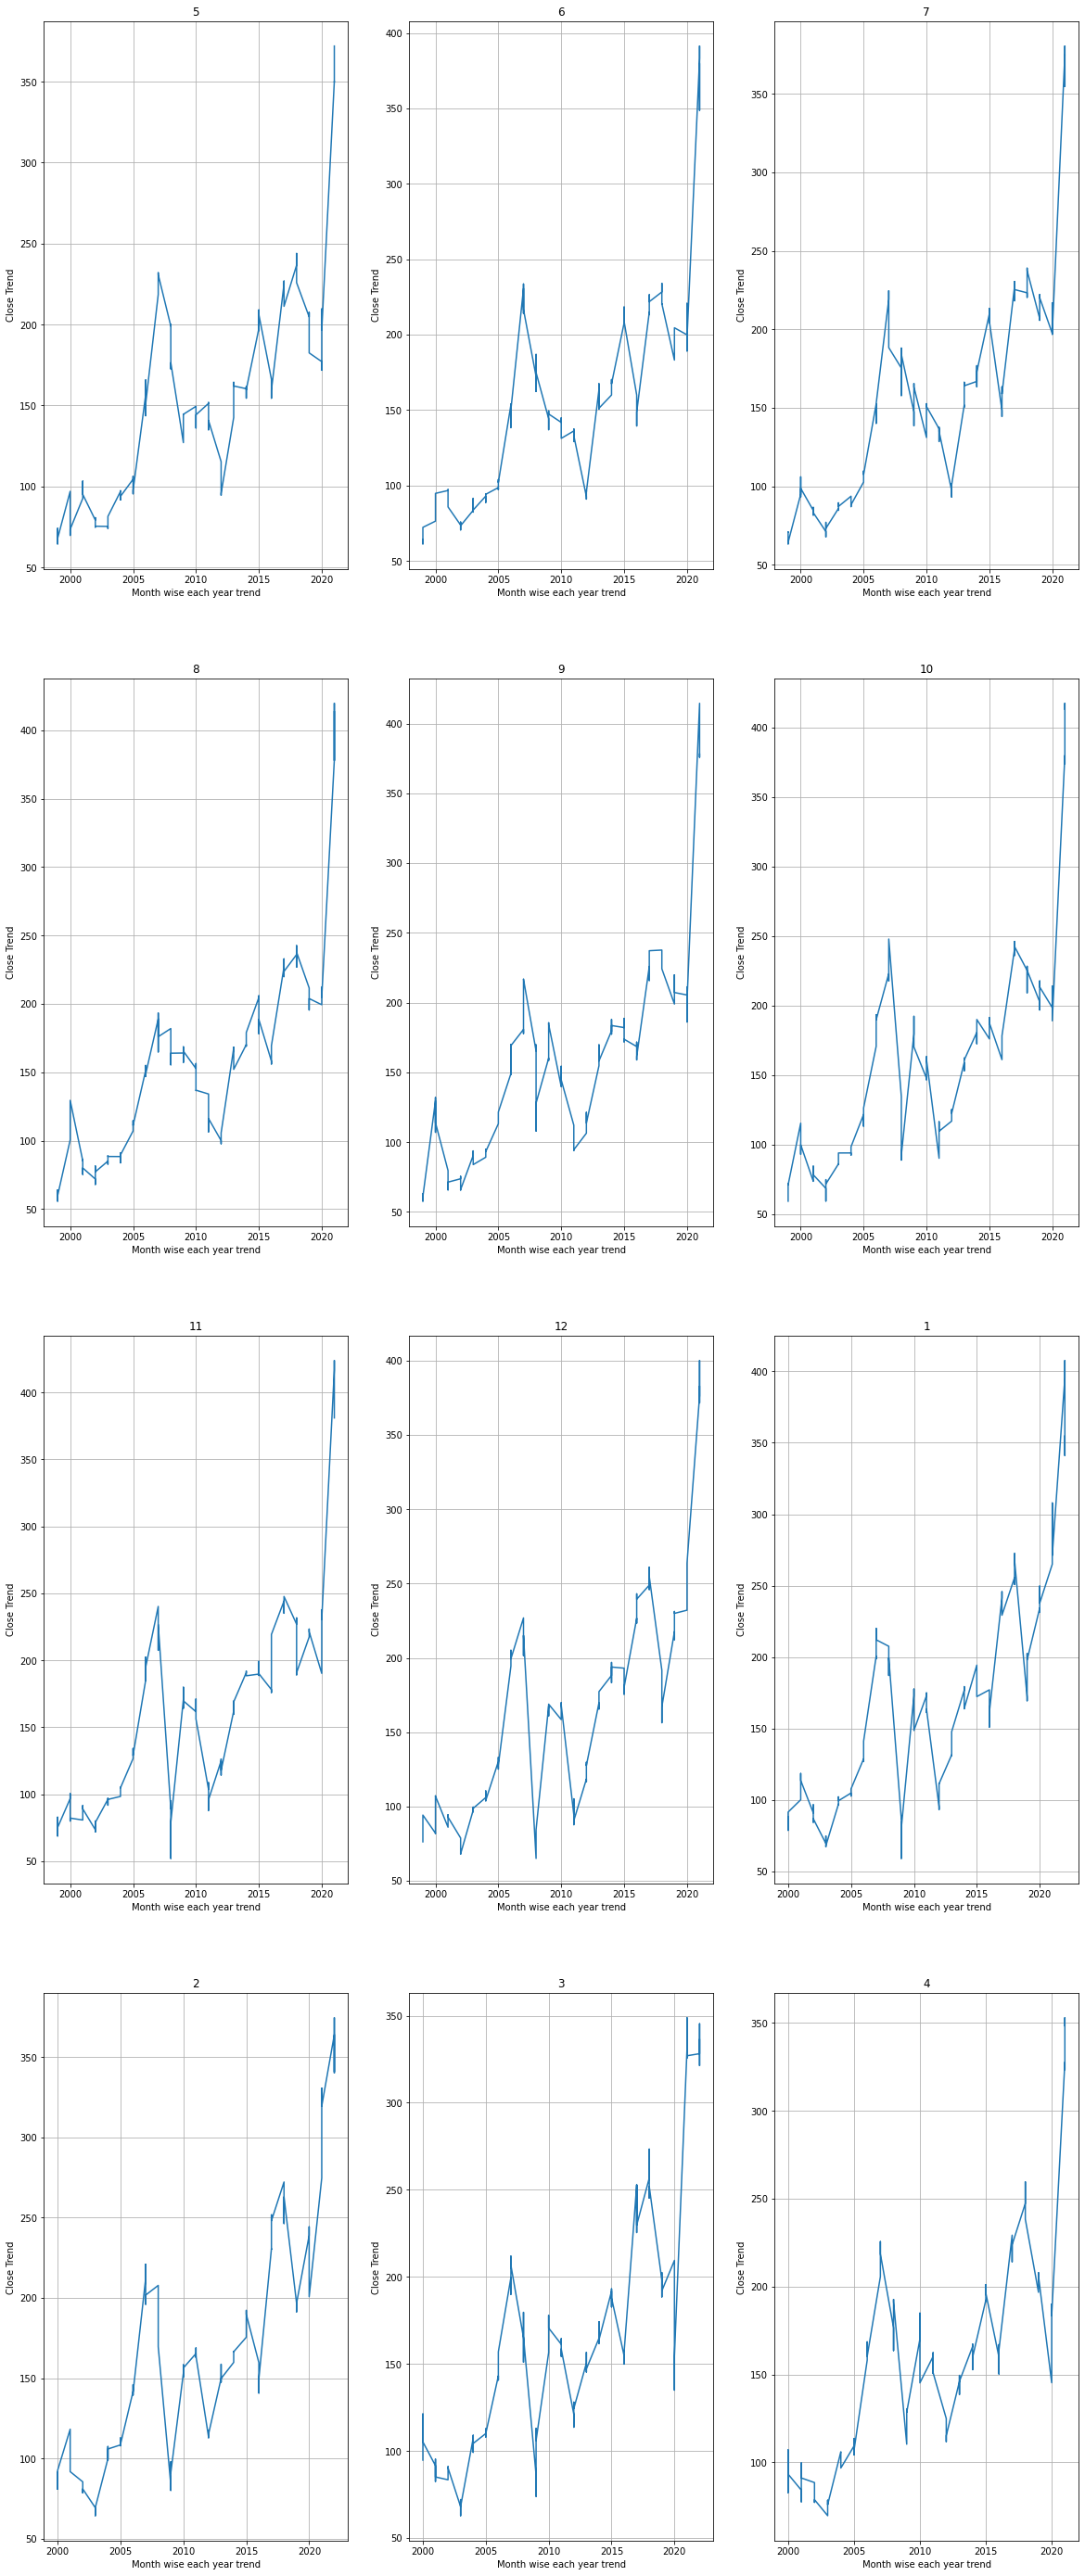

In [21]:
figure = plt.figure(figsize=(20,50))
for a,x in enumerate(month):
    plots = figure.add_subplot(4,3,a+1)
    plt.grid(True)
    P=data.loc[data['Month']==x,['Close','Year']]
    plt.plot(P['Year'],P['Close'])
    plots.set_title(x)
    plots.set_xlabel('Month wise each year trend')
    plots.set_ylabel('Close Trend')

(array([ 903., 1213., 1058., 1181.,  844.,  260.,   25.,   83.,  104.,
          91.]),
 array([ 52.       ,  89.1850006, 126.3700012, 163.5550018, 200.7400024,
        237.925003 , 275.1100036, 312.2950042, 349.4800048, 386.6650054,
        423.850006 ]),
 <BarContainer object of 10 artists>)

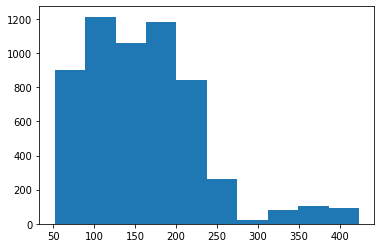

In [22]:
plt.hist(data['Close'])


array([[<AxesSubplot:title={'center':'Date'}>,
        <AxesSubplot:title={'center':'Open'}>,
        <AxesSubplot:title={'center':'High'}>],
       [<AxesSubplot:title={'center':'Low'}>,
        <AxesSubplot:title={'center':'Close'}>,
        <AxesSubplot:title={'center':'Adj Close'}>],
       [<AxesSubplot:title={'center':'Volume'}>,
        <AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Month'}>]], dtype=object)

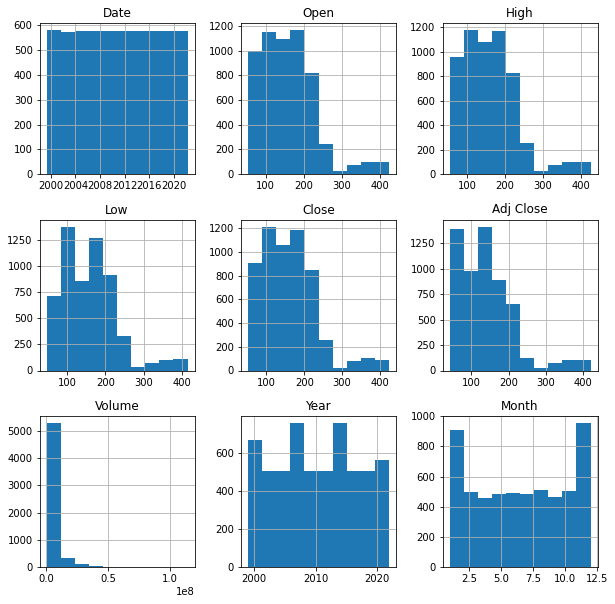

In [23]:
data.hist(figsize=(10,10))

C:\Users\sejal\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='Close'>

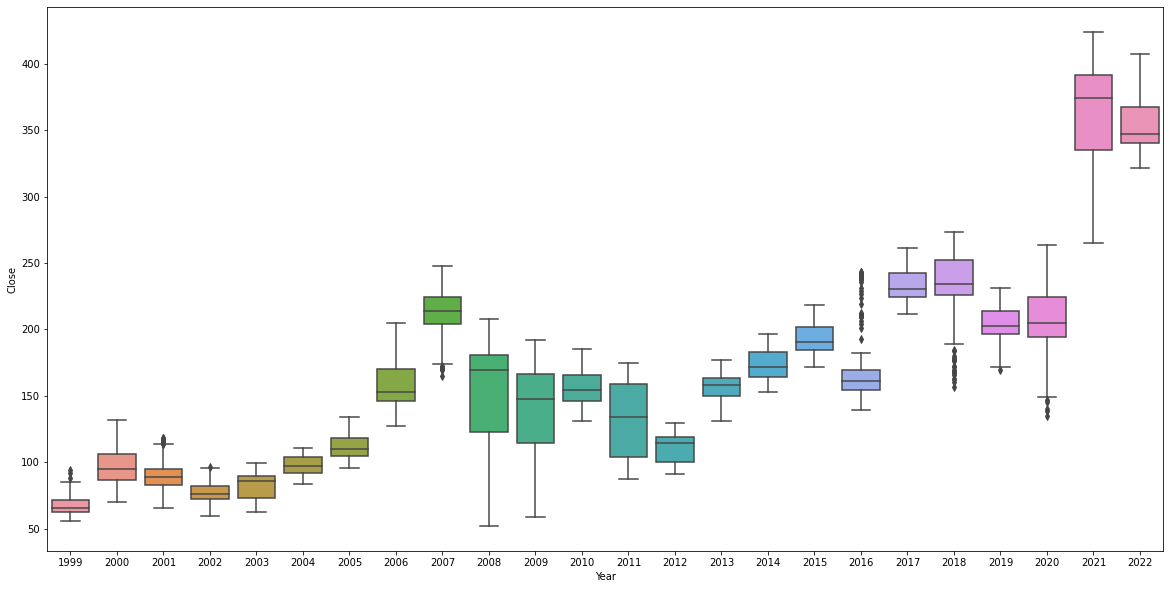

In [24]:
plt.figure(figsize=(20,10))
sns.boxplot(data['Year'],data['Close'])

C:\Users\sejal\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Month', ylabel='Close'>

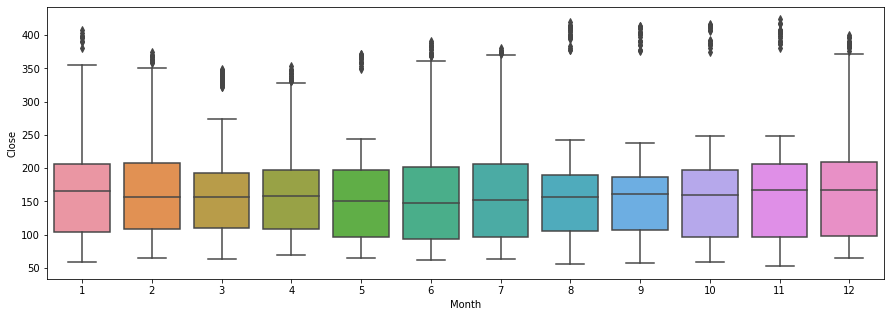

In [25]:
plt.figure(figsize=(15,5))
sns.boxplot(data['Month'],data['Close'])

In [26]:
def rolling_average(timeframe,window,plot_intervals=False, scale=1.96):
    roll_avg = timeframe.rolling(window = window).mean()
    plt.figure(figsize=(17,8))
    plt.title('Moving average\n window size ={}'.format(window))
    plt.plot(roll_avg, 'r', label = "Rolling mean Trend")
    
    if plot_intervals:
        mae = mean_absolute_error(timeframe[window:], roll_avg[window:])
        sd = np.std(timeframe[window:]-roll_avg[window:])
        lower_bound = roll_avg - (mae+sd*scale)
        upper_bound = roll_avg + (mae+sd*scale)
        plt.plot(lower_bound,'y--', label = "lower bound")
        plt.plot(upper_bound,'y--', label = "upper bound")
    plt.plot(timeframe[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
        
 
        
    

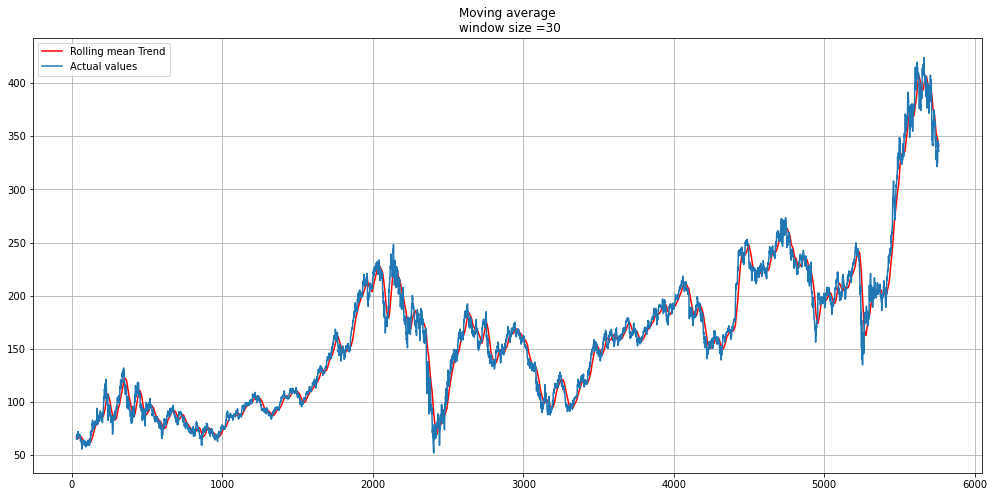

In [27]:
rolling_average(data['Close'],30,plot_intervals=False, scale=1.96)

##### 

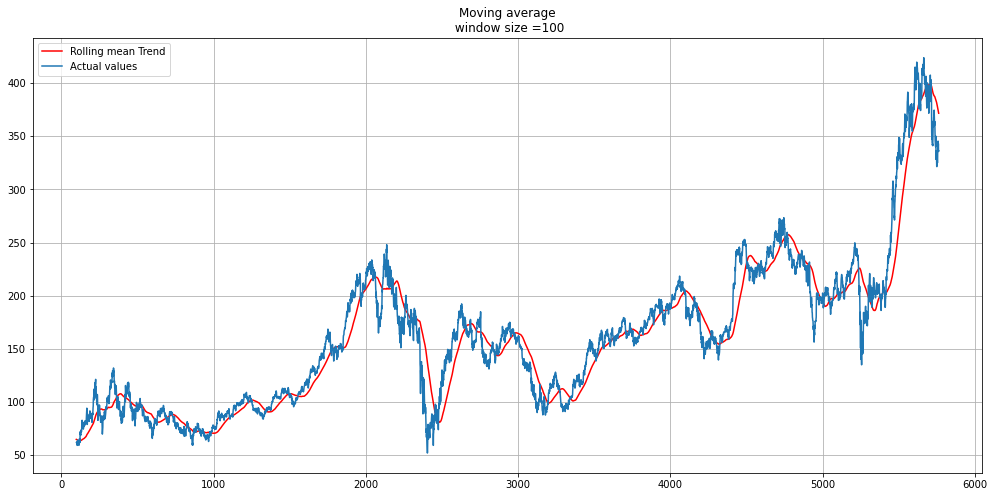

In [28]:
rolling_average(data['Close'],100,plot_intervals=False, scale=1.96)

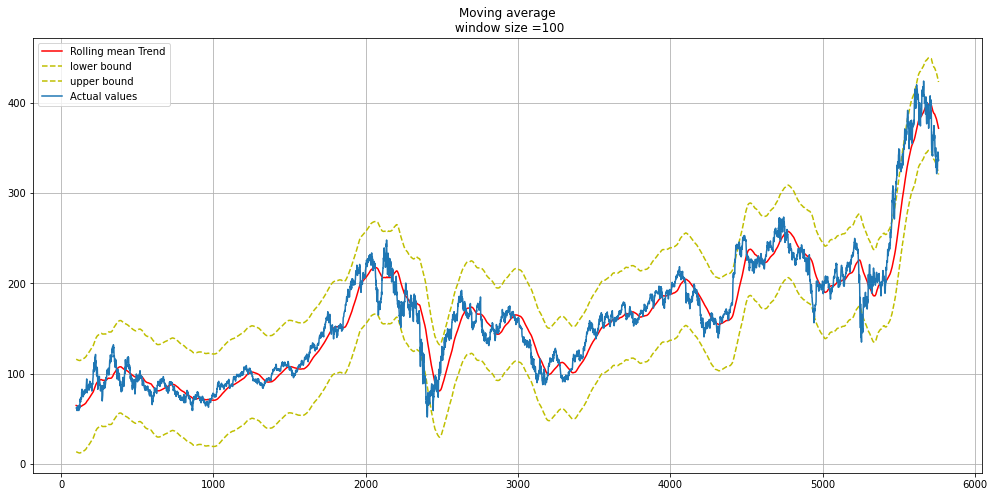

In [29]:
rolling_average(data['Close'],100,plot_intervals=True, scale=1.96)

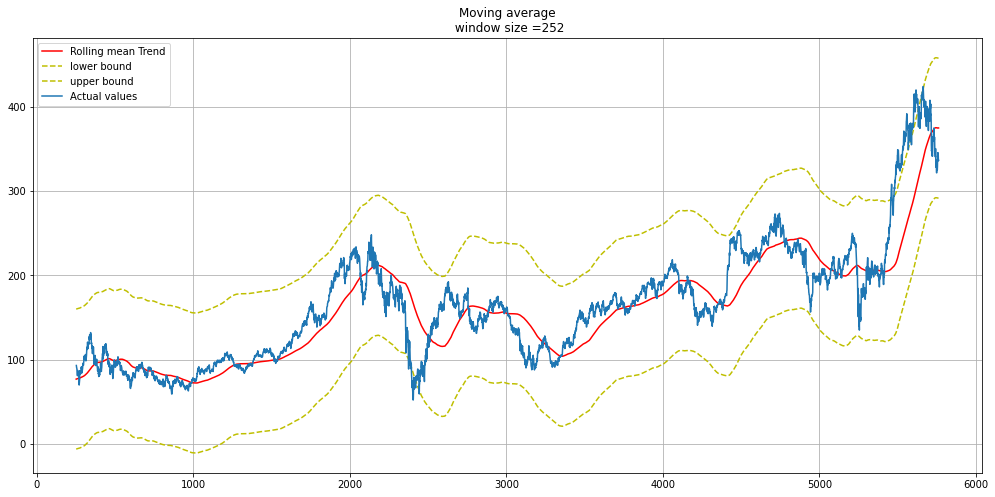

In [30]:
rolling_average(data['Close'],252,plot_intervals=True, scale=1.96)

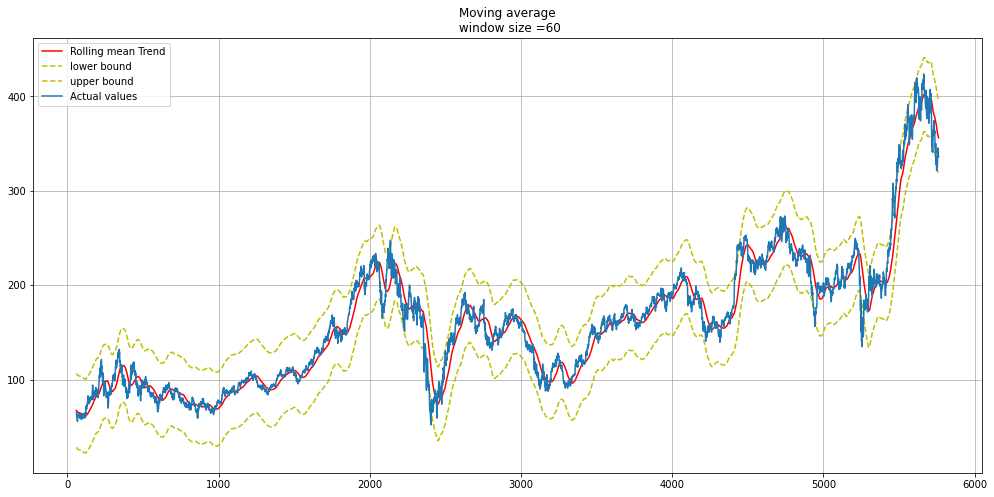

In [31]:
rolling_average(data['Close'],60,plot_intervals=True, scale=1.96)

In [32]:
data


,Date,Open,High,Low,Close,Adj Close,Volume,Year,Month
0,1999-05-04,76.000000,77.250000,70.000000,70.375000,53.576797,22320900,1999,5
1,1999-05-05,69.875000,69.875000,66.250000,69.125000,52.625153,7565700,1999,5
2,1999-05-06,68.000000,69.375000,67.062500,67.937500,51.721100,2905700,1999,5
3,1999-05-07,67.937500,74.875000,66.750000,74.125000,56.431648,4862300,1999,5
4,1999-05-10,73.375000,73.500000,70.250000,70.687500,53.814709,2589400,1999,5
...,...,...,...,...,...,...,...,...,...
5757,2022-03-18,338.869995,346.769989,337.299988,345.380005,345.380005,5861100,2022,3
5758,2022-03-21,345.260010,346.299988,337.149994,339.000000,339.000000,3401200,2022,3
5759,2022-03-22,342.200012,346.239990,340.119995,343.010010,343.010010,2840200,2022,3
5760,2022-03-23,340.000000,340.829987,335.130005,335.609985,335.609985,2196800,2022,3


In [33]:
from statsmodels.tsa.stattools import adfuller

In [34]:
adf_test = adfuller(data['Close'])

In [36]:
print(adf_test)

(-1.045984628670512, 0.7361253653755162, 9, 5752, {'1%': -3.431487381900231, '5%': -2.862042614273643, '10%': -2.5670375396995615}, 30231.88289858417)


In [39]:
def adf_results(adf_test):
    output = pd.Series(adf_test[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adf_test[4].items():
        output['critical value (%s)'%key] =  values
    print(output)
    
        

In [40]:
adf_results(adf_test)

Test Statistics                  -1.045985
p-value                           0.736125
No. of lags used                  9.000000
Number of observations used    5752.000000
critical value (1%)              -3.431487
critical value (5%)              -2.862043
critical value (10%)             -2.567038
dtype: float64


In [65]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [71]:
result = seasonal_decompose(data['Close'], model='additive', freq= 365)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'